In [101]:
import matplotlib.pyplot as plt
import math

In [63]:
# parameter declarations
wavelength = 1030e-9
frequency = 2.9106063883e14
c = 299792458
electron_charge = 1.602176634e-19
electron_mass = 9.1093837139e-31 #kilogram
reduced_planck = 1.054571817e-34 #electron volt
# band_gap = 9.4 to 9.9 google says 8.96
band_gap = 1.506e-18 #converted from eV to J
pi = 3.14159265358979323846264338327950
# 300 fs laser pulse
e_amplitude = 2.74e10 # V/m
eosc = ((electron_charge**2)*(e_amplitude**2))/(4*electron_mass*(frequency**2))
nph = band_gap/(reduced_planck*frequency)
boltzmann_constant = 1.380649e-23 # J/K
a_bohr = (reduced_planck**2)/(electron_mass*(electron_charge**2))


In [97]:
#temporarily assuming a 1:1 electron to free atom ionization ratio
def electron_density(free_electron, free_atom_current, time):
    
    na_term = free_atom*wmpi/wimp
    one_minus = 1-math.exp(-1*wimp*time)
    free_electron = (free_electron + na_term*one_minus)*(math.exp(wimp*t))
    free_atom_current = free_atom - free_electron
    return free_electron, free_atom_current

def cw(free_electron):
     return 0.31*pi*a_bohr*(free_electron**1/3)

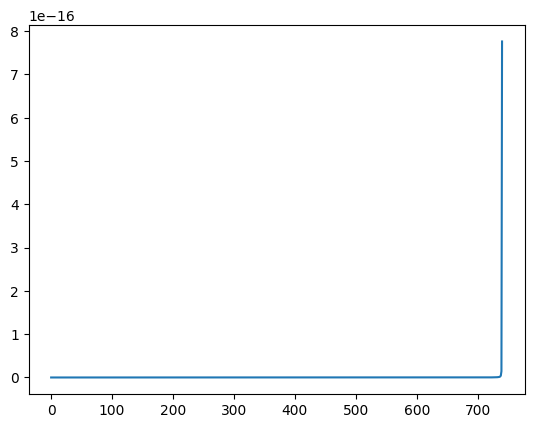

In [108]:
free_electron_not = 1e-20
free_atom = 8.67e10
wmpi = (frequency*(nph**1.5))*((eosc/(2*band_gap))**nph)
rho = []
for t in range(741):
    dt = t*pow(10,-17)
    p_exchange = (3/2)*cw(free_electron_not)*((boltzmann_constant*293.15)/reduced_planck) #assuming 293.15 kelvin lattice temperature
    wimp = (eosc/band_gap)*((frequency**2*p_exchange)/(p_exchange**2+frequency**2))
    free_electron_not, free_atom = electron_density(free_electron_not,free_atom,dt)
    rho.append(free_electron_not)
xs = [x for x in range(len(rho))]
plt.plot(xs, rho)
plt.show()
plt.close()
